# Import Required Libraries

In [1]:
import os
import numpy as np
import zipfile
import tensorflow as tf
import shutil
from tqdm import tqdm
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models,optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Dense
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


# Extract Data from Orginal Data Source


In [2]:
# # Base directory
# base_dir = r"C:\Users\sondo\OneDrive - Faculty of Computer and Information Sciences (Ain Shams University)\Desktop\NewProjectData\PetImages"
# # Paths to Cat and Dog folders
# cat_dir = os.path.join(base_dir, 'Cat')
# dog_dir = os.path.join(base_dir, 'Dog')



In [3]:
path= r"C:\Users\sondo\OneDrive - Faculty of Computer and Information Sciences (Ain Shams University)\Desktop\NewProjectData"

In [4]:
new_data_dir = os.path.join(path, 'data_used')
new_cat_dir = os.path.join(new_data_dir, 'cat')
new_dog_dir = os.path.join(new_data_dir, 'dog')

In [5]:
# os.makedirs(new_cat_dir, exist_ok=True)
# os.makedirs(new_dog_dir, exist_ok=True)

In [6]:
# # Get all image files from the original folders
# cat_images = [f for f in os.listdir(cat_dir) if os.path.isfile(os.path.join(cat_dir, f))]
# dog_images = [f for f in os.listdir(dog_dir) if os.path.isfile(os.path.join(dog_dir, f))]

# # Randomly sample 19000 images from each folder
# cat_images_sample = cat_images[:9500]
# dog_images_sample = dog_images[:9500]

# # Copy the sampled images to the new folders
# print("Copying cat images...")
# for image in tqdm(cat_images_sample):
#     src_path = os.path.join(cat_dir, image)
#     dest_path = os.path.join(new_cat_dir, image)
#     shutil.copy(src_path, dest_path)

# print("Copying dog images...")
# for image in tqdm(dog_images_sample):
#     src_path = os.path.join(dog_dir, image)
#     dest_path = os.path.join(new_dog_dir, image)
#     shutil.copy(src_path, dest_path)

# print("Data preparation complete. Folder structure:")
# print(f"Cats: {new_cat_dir}")
# print(f"Dogs: {new_dog_dir}")

In [7]:

print("Data preparation complete. Folder structure:")
print(f"Cats: {new_cat_dir}")
print(f"Dogs: {new_dog_dir}")

Data preparation complete. Folder structure:
Cats: C:\Users\sondo\OneDrive - Faculty of Computer and Information Sciences (Ain Shams University)\Desktop\NewProjectData\data_used\cat
Dogs: C:\Users\sondo\OneDrive - Faculty of Computer and Information Sciences (Ain Shams University)\Desktop\NewProjectData\data_used\dog


#  Load and Normalization Data


In [8]:
# Image dimensions and batch size
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32
# Function to load images
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)
        try:
            img = tf.keras.preprocessing.image.load_img(filepath, target_size=(IMG_HEIGHT, IMG_WIDTH))
            img = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filepath}: {e}")
    return np.array(images), np.array(labels)

# Load cat and dog images
cat_images, cat_labels = load_images_from_folder(new_cat_dir, label=0)
dog_images, dog_labels = load_images_from_folder(new_dog_dir, label=1)

# Combine datasets
X = np.concatenate((cat_images, dog_images), axis=0)
y = np.concatenate((cat_labels, dog_labels), axis=0)

print(f"Total images: {len(X)}")

# Normalize pixel values
X = X / 255.0



Error loading C:\Users\sondo\OneDrive - Faculty of Computer and Information Sciences (Ain Shams University)\Desktop\NewProjectData\data_used\cat\666.jpg: cannot identify image file <_io.BytesIO object at 0x0000024C91BCA570>
Error loading C:\Users\sondo\OneDrive - Faculty of Computer and Information Sciences (Ain Shams University)\Desktop\NewProjectData\data_used\dog\11702.jpg: cannot identify image file <_io.BytesIO object at 0x0000024CECC73650>
Total images: 18998


# Split into training, validation, and test sets


In [9]:
# split dataset into 70 % for training and 15 % for validation and 15 % for test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}, Testing samples: {len(X_test)}")


Training samples: 13298, Validation samples: 2850, Testing samples: 2850


# Explore Data

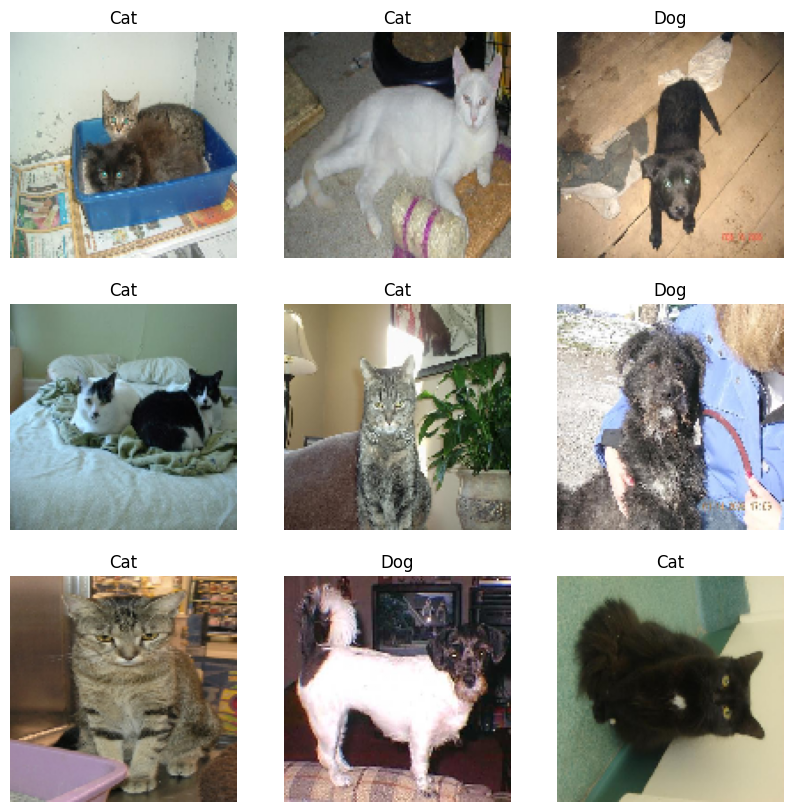

In [10]:
# Plot a few images with labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i])
    plt.title("Cat" if y_train[i] == 0 else "Dog")
    plt.axis('off')
plt.show()


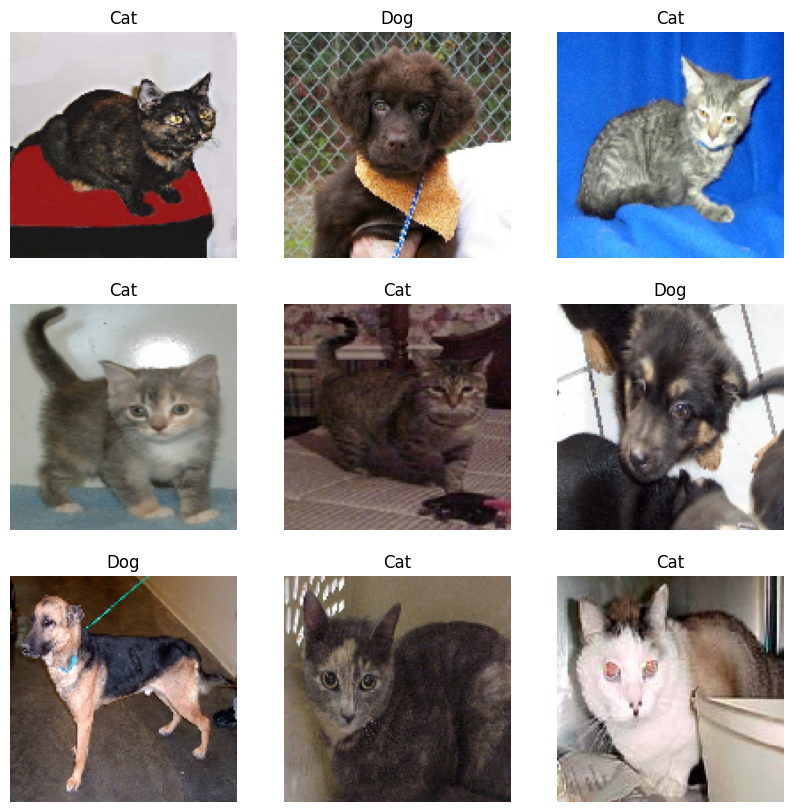

In [11]:
# Plot a few images with labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_temp[i])
    plt.title("Cat" if y_temp[i] == 0 else "Dog")
    plt.axis('off')
plt.show()

# Data augmentation

In [12]:
for filename in os.listdir(new_cat_dir):
    filepath = os.path.join(new_cat_dir, filename)
    try:
        img = tf.keras.preprocessing.image.load_img(filepath, target_size=(IMG_HEIGHT, IMG_WIDTH))
        print(f"Image shape: {np.array(img).shape}, Mode: {img.mode}")
    except Exception as e:
        print(f"Error loading {filepath}: {e}")


Image shape: (128, 128, 3), Mode: RGB
Image shape: (128, 128, 3), Mode: RGB
Image shape: (128, 128, 3), Mode: RGB
Image shape: (128, 128, 3), Mode: RGB
Image shape: (128, 128, 3), Mode: RGB
Image shape: (128, 128, 3), Mode: RGB
Image shape: (128, 128, 3), Mode: RGB
Image shape: (128, 128, 3), Mode: RGB
Image shape: (128, 128, 3), Mode: RGB
Image shape: (128, 128, 3), Mode: RGB
Image shape: (128, 128, 3), Mode: RGB
Image shape: (128, 128, 3), Mode: RGB
Image shape: (128, 128, 3), Mode: RGB
Image shape: (128, 128, 3), Mode: RGB
Image shape: (128, 128, 3), Mode: RGB
Image shape: (128, 128, 3), Mode: RGB
Image shape: (128, 128, 3), Mode: RGB
Image shape: (128, 128, 3), Mode: RGB
Image shape: (128, 128, 3), Mode: RGB
Image shape: (128, 128, 3), Mode: RGB
Image shape: (128, 128, 3), Mode: RGB
Image shape: (128, 128, 3), Mode: RGB
Image shape: (128, 128, 3), Mode: RGB
Image shape: (128, 128, 3), Mode: RGB
Image shape: (128, 128, 3), Mode: RGB
Image shape: (128, 128, 3), Mode: RGB
Image shape:

In [13]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
)

val_datagen = ImageDataGenerator()

# Create data generators
train_data = train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)
val_data= val_datagen.flow(X_val, y_val, batch_size=BATCH_SIZE)

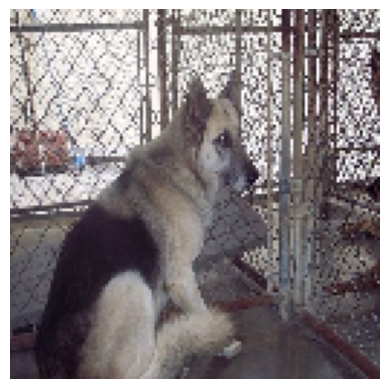

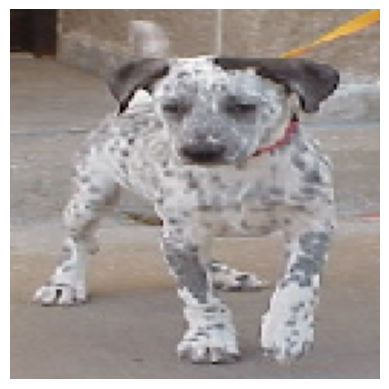

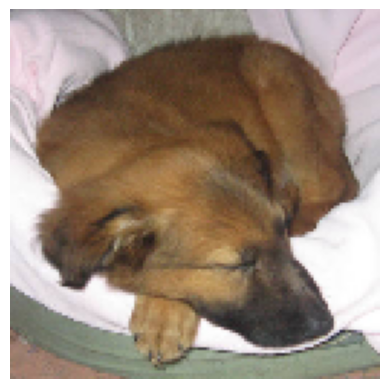

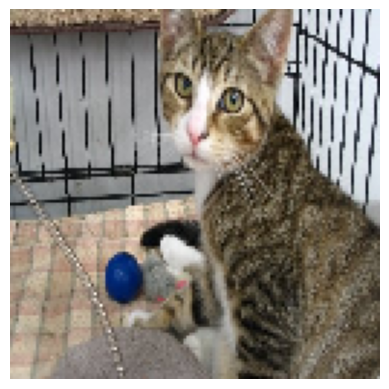

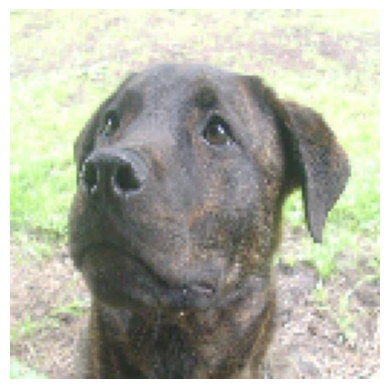

In [14]:
# Visualize augmented images
augmented_images, _ = next(val_data)
for i in range(5):
    plt.imshow(augmented_images[i])
    plt.axis('off')
    plt.show()


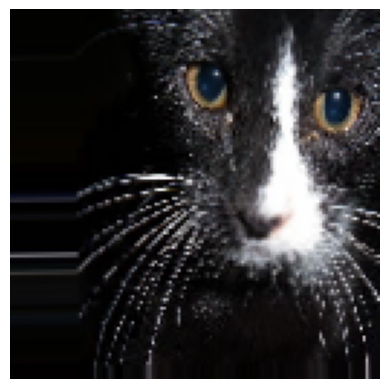

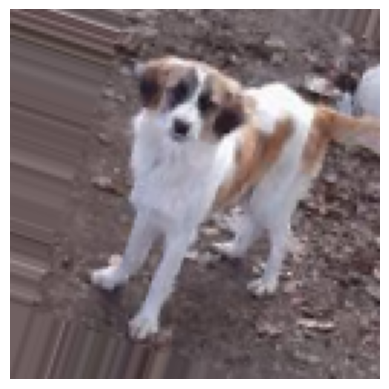

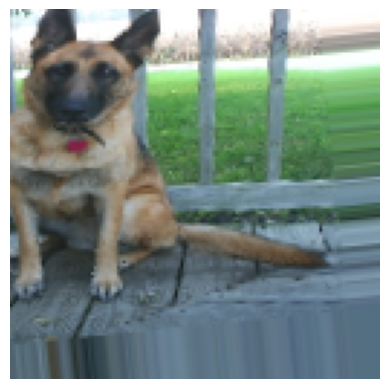

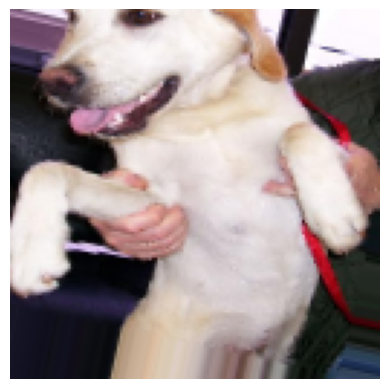

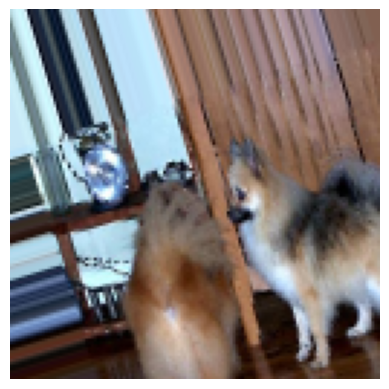

In [15]:
# Visualize augmented images
augmented_images, _ = next(train_data)
for i in range(5):
    plt.imshow(augmented_images[i])
    plt.axis('off')
    plt.show()


# Pretrained Model: InceptionV3

#### Load model 

In [16]:


# Load InceptionV3 model without the top layers (include_top=False)
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the layers of InceptionV3
for layer in inception_base.layers:
    layer.trainable = False

# Define the custom classification head using the Functional API
input_layer = layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
inception_output = inception_base(input_layer)  # Pass the input through the InceptionV3 base model
flattened = layers.Flatten()(inception_output)
dense_1 = layers.Dense(256, activation='relu')(flattened)
dropout = layers.Dropout(0.5)(dense_1)
output = layers.Dense(1, activation='sigmoid')(dropout)

# Create the model
inception_model = models.Model(inputs=input_layer, outputs=output)

# Compile the model
inception_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the summary of the model
inception_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 2, 2, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,900,449 (91.17 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

### Fit the model

In [17]:
# Fit the model with training and validation data
history_inception = inception_model.fit(
    train_data,
    epochs=10,  # Number of epochs
    validation_data=(val_data)  # Validation data
)


Epoch 1/10


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


416/416 ━━━━━━━━━━━━━━━━━━━━ 138s 309ms/step - accuracy: 0.8346 - loss: 1.2294 - val_accuracy: 0.9330 - val_loss: 0.1586
Epoch 2/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 109s 261ms/step - accuracy: 0.8933 - loss: 0.2545 - val_accuracy: 0.9375 - val_loss: 0.1524
Epoch 3/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 113s 270ms/step - accuracy: 0.8986 - loss: 0.2400 - val_accuracy: 0.9442 - val_loss: 0.1350
Epoch 4/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 101s 241ms/step - accuracy: 0.9065 - loss: 0.2263 - val_accuracy: 0.9425 - val_loss: 0.1345
Epoch 5/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 100s 240ms/step - accuracy: 0.9062 - loss: 0.2223 - val_accuracy: 0.9411 - val_loss: 0.1379
Epoch 6/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 102s 245ms/step - accuracy: 0.9080 - loss: 0.2271 - val_accuracy: 0.9421 - val_loss: 0.1448
Epoch 7/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 99s 236ms/step - accuracy: 0.9119 - loss: 0.2183 - val_accuracy: 0.9449 - val_loss: 0.1432
Epoch 8/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 98s 235ms/step - accuracy: 0.9083 - loss: 0.2174

### Evaluation

In [18]:
# Evaluate the InceptionV3 model on the test set
test_loss_inception, test_accuracy_inception = inception_model.evaluate(X_test, y_test, batch_size=32)

print(f"InceptionV3 Test Accuracy: {test_accuracy_inception * 100:.2f}%")
print(f"InceptionV3 Test Loss: {test_loss_inception:.4f}")


90/90 ━━━━━━━━━━━━━━━━━━━━ 14s 159ms/step - accuracy: 0.9506 - loss: 0.1371
InceptionV3 Test Accuracy: 94.46%
InceptionV3 Test Loss: 0.1436


90/90 ━━━━━━━━━━━━━━━━━━━━ 20s 186ms/step


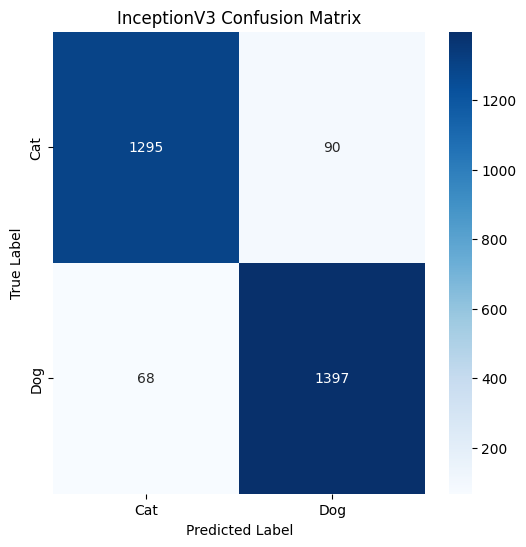

InceptionV3 Classification Report:
              precision    recall  f1-score   support

         Cat       0.95      0.94      0.94      1385
         Dog       0.94      0.95      0.95      1465

    accuracy                           0.94      2850
   macro avg       0.94      0.94      0.94      2850
weighted avg       0.94      0.94      0.94      2850



In [19]:
# Get predictions from the InceptionV3 model
y_pred_inception = inception_model.predict(X_test)
y_pred_inception = (y_pred_inception > 0.5).astype(int)  # Convert predictions to binary (0 or 1)

# Generate confusion matrix
cm_inception = confusion_matrix(y_test, y_pred_inception)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_inception, annot=True, fmt="d", cmap="Blues", xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.title("InceptionV3 Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report for InceptionV3
print("InceptionV3 Classification Report:")
print(classification_report(y_test, y_pred_inception, target_names=['Cat', 'Dog']))


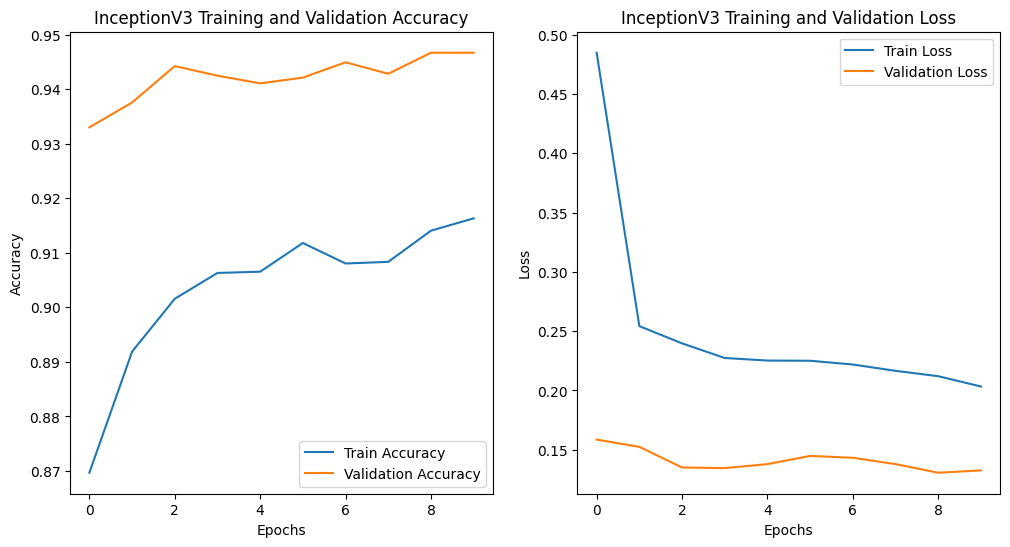

In [20]:
# Plot training and validation accuracy for InceptionV3
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_inception.history['accuracy'], label='Train Accuracy')
plt.plot(history_inception.history['val_accuracy'], label='Validation Accuracy')
plt.title('InceptionV3 Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss for InceptionV3
plt.subplot(1, 2, 2)
plt.plot(history_inception.history['loss'], label='Train Loss')
plt.plot(history_inception.history['val_loss'], label='Validation Loss')
plt.title('InceptionV3 Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Custom Model From Scratch

### Define the model

In [21]:
# Custom CNN model

custom_cnn_model = models.Sequential()
# First Convolutional Block
custom_cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
custom_cnn_model.add(layers.BatchNormalization()),
custom_cnn_model.add(layers.MaxPooling2D((2, 2)))
# Second Convolutional Block
custom_cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
custom_cnn_model.add(layers.BatchNormalization()),
custom_cnn_model.add(layers.MaxPooling2D((2, 2)))
# Third Convolutional Block
custom_cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
custom_cnn_model.add(layers.BatchNormalization()),
custom_cnn_model.add(layers.MaxPooling2D((2, 2)))
# Flatten the output before feeding to fully connected layers
custom_cnn_model.add(layers.Flatten()),
# Fully connected layer with 512 neurons
custom_cnn_model.add(layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
# Dropout layer to prevent overfitting
custom_cnn_model.add(layers.Dropout(0.5))
# Output layer with a sigmoid activation for binary classification (Cat or Dog)
custom_cnn_model.add(layers.Dense(1, activation='sigmoid'))
    

# Compile the model
adam_optimizer = Adam(learning_rate=1e-4)
custom_cnn_model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print the summary of the custom CNN model
custom_cnn_model.summary()



c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_94 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_94          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_95 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_95          │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_96 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_96          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,940,225 (49.36 MB)

 Trainable params: 12,939,777 (49.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [22]:


# Early stopping: Stop training when the validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Reduce learning rate when the validation loss stops improving
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

In [23]:
# Train the custom CNN model
history_custom_cnn = custom_cnn_model.fit(
    train_data,
    epochs=30,  # You can increase epochs for better results
    validation_data=val_data,
    callbacks=[early_stopping, lr_reduction]
)


Epoch 1/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 205s 485ms/step - accuracy: 0.6019 - loss: 0.9578 - val_accuracy: 0.6449 - val_loss: 0.7290 - learning_rate: 1.0000e-04
Epoch 2/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 211s 507ms/step - accuracy: 0.6708 - loss: 0.6146 - val_accuracy: 0.7232 - val_loss: 0.5362 - learning_rate: 1.0000e-04
Epoch 3/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 206s 493ms/step - accuracy: 0.6945 - loss: 0.5747 - val_accuracy: 0.7365 - val_loss: 0.5313 - learning_rate: 1.0000e-04
Epoch 4/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 1709s 4s/step - accuracy: 0.7276 - loss: 0.5443 - val_accuracy: 0.7561 - val_loss: 0.5156 - learning_rate: 1.0000e-04
Epoch 5/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 261s 626ms/step - accuracy: 0.7432 - loss: 0.5241 - val_accuracy: 0.7804 - val_loss: 0.4641 - learning_rate: 1.0000e-04
Epoch 6/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 257s 614ms/step - accuracy: 0.7446 - loss: 0.5121 - val_accuracy: 0.7832 - val_loss: 0.4573 - learning_rate: 1.0000e-04
Epoch 7/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 25

In [24]:
# Evaluate the custom CNN model on the test set
test_loss_custom_cnn, test_accuracy_custom_cnn = custom_cnn_model.evaluate(X_test, y_test, batch_size=32)

print(f"Custom CNN Test Accuracy: {test_accuracy_custom_cnn * 100:.2f}%")
print(f"Custom CNN Test Loss: {test_loss_custom_cnn:.4f}")


90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.8764 - loss: 0.3008
Custom CNN Test Accuracy: 87.54%
Custom CNN Test Loss: 0.3063


### Evaluate the model

90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step


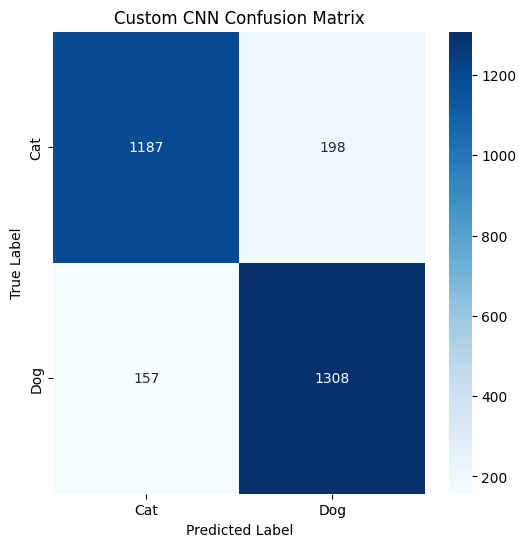

Custom CNN Classification Report:
              precision    recall  f1-score   support

         Cat       0.88      0.86      0.87      1385
         Dog       0.87      0.89      0.88      1465

    accuracy                           0.88      2850
   macro avg       0.88      0.87      0.88      2850
weighted avg       0.88      0.88      0.88      2850



In [29]:
# Get predictions from the custom CNN model
y_pred_custom_cnn = custom_cnn_model.predict(X_test)
y_pred_custom_cnn = (y_pred_custom_cnn > 0.5).astype(int)  # Convert predictions to binary (0 or 1)

# Generate confusion matrix
cm_custom_cnn = confusion_matrix(y_test, y_pred_custom_cnn)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_custom_cnn, annot=True, fmt="d", cmap="Blues", xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.title("Custom CNN Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report for custom CNN
print("Custom CNN Classification Report:")
print(classification_report(y_test, y_pred_custom_cnn, target_names=['Cat', 'Dog']))
